# [*Lab Project Part 1*]() Image Classification using Bag-of-Words
------------------------------

# **General Guideline**
1. Aim:
    - Able to understand the basic Image Classification/Recognition pipeline using traditional Bag of Words method.
    - Able to use to python packages for image classification: *matplotlib, cv2, sklearn etc.*
2. Prerequisite:
    - Familiar with python and relevant packages.
    - Know the basics of feature descriptors(SIFT, HoG) and machine learning tools (K-means, SVM and etc.). 
3. Guidelines:
    Students should work on the assignments in a group of **three person** for two weeks. Some minor additions and changes  might happen with approval from the Senior TA. Students will be informed for these changes via Canvas. Any questions regarding the assignment content can be discussed on Piazza. Students are expected to do this assignment in Python and Pytorch, however students are free to choose other tools (like Tensorflow). Your source code and report must be handed in together in a zip file (*ID1_ID2_ID3.zip*) before the deadline. Make sure your report follows these guidelines:
    - *The maximum number of pages is 10 (single-column, including tables and figures). Please express your thoughts concisely.*
    - *Follow the given script and answer all given questions (in green boxes). Briefly describe what you implemented. Blue boxes are there to give you hints to answer questions.*
    - *Analyze your results and discuss them, e.g. why algorithm A works better than algorithm B on a certain problem.*
    - *Tables and figures must be accompanied by a brief description. Do not forget to add a number, a title, and if applicable name and unit of variables in a table, name and unit of axes and legends in a figure.*
4. **Late submissions** are not allowed. Assignments that are submitted after the strict deadline will not be graded. In case of submission conflicts, TAs' system clock is taken as reference. We strongly recommend submitting well in advance, to avoid last minute system failure issues.
5. **Plagiarism note**: 
Keep in mind that plagiarism (submitted materials which are not your work) is a serious crime and any misconduct shall be punished with the university regulations.

<!-- ### PyTorch versions
we assume that you are using latest PyTorch version(>=1.4)

### PyTorch Tutorial & Docs
This tutorial aims to make you familiar with the programming environment that will be used throughout the course. If you have experience with PyTorch or other frameworks (TensorFlow, MXNet *etc.*), you can skip the tutorial exercises; otherwise, we suggest that you complete them all, as they are helpful for getting hands-on experience.

**Anaconda Environment** We recommend installing \textit{anaconda} for configuring \textit{python} package dependencies, whereas it's also fine to use other environment managers as you like. The installation of anaconda can be found in [anaconda link](https://docs.anaconda.com/anaconda/install/).

**Installation** The installation of PyTorch is available at [install link](https://pytorch.org/get-started/locally/) depending on your device and system.

**Getting start** The 60-minute blitz can be found at [blitz](https://pytorch.org/tutorials/beginner/deep_learning_60min_blitz.html), and and examples are at [examples](https://pytorch.org/tutorials/beginner/pytorch_with_examples.html)

**Documents** There might be potential unknown functions or classes, you shall look through the official documents website ([Docs](https://pytorch.org/docs/stable/index.html)) and figure them out by yourself. (***Think***:} What's the difference between *torch.nn.Conv2d* and *torch.nn.functional.conv2d*?)
You can learn pytorch from the [tutorial link](https://pytorch.org/tutorials/). The Docs information can be searched at [Docs](https://pytorch.org/docs/stable/index.html). In this assignments, we wish you to form the basic capability of using one of the well-known   -->

# **Instruction**

1. Students are expected to prepare a report for this project. The report should include the analysis of the results for different settings.

 Do not just provide numbers, remember to follow the general guidelines and discuss different settings.

2. For qualitative evaluation, you are expected to visualize the top-5 and the bottom-5 ranked test images (based on the classifier confidence for the target class) per setup. That means you are supposed to provide a figure for each experimental setup, as discussed in Section 2.6.

3. A demo function which runs the whole system should be prepared and submitted with all other implemented functions.

**Hint:** Having visual elements such as charts, graphs and plots are always useful for everyone. Keep this in mind while writing your reports. 


# **1. Introduction**

The goal of the assignment is to implement a system for image classification. In other words, this system should tell if there is an object of given class in an image. You will perform 5-class ({1: *airplanes*, 2: *birds*, 3: *ships*, 4: *horses*, 5: *cars*}) image classification based on bag-of-words approach ([reference](http://www.robots.ox.ac.uk/~az/icvss08_az_bow.pdf)) using SIFT features, respectively. [STL-10 dataset](https://cs.stanford.edu/~acoates/stl10/) will be used for the task. For each class, test sub-directories contain 800 images, and training sub-directories contain 500 images. Images are represented as (RGB) 96x96 pixels.

Download the [dataset](http://ai.stanford.edu/~acoates/stl10/stl10_binary.tar.gz). There are five files: *test_X.bin*, *test_y.bin*, *train_X.bin*,*train_y.bin* and *unlabeled_X.bin*. For the project, you will just use the train and test partitions. Download the dataset and make yourself familiar with it by figuring out which images and labels you need for the aforementioned 5 classes. Note that you do not need *fold_indices* variable.

**Hint:**
In a real scenario, the public data you use often deviates from your task. You need to figure it out and re-arrange the labels as required using *stl10\_input.py* as a reference. 

## **1.1 Training Phase**

Training must be conducted over the training set. Keep in mind that using more samples in training will likely result in better performance. However, if your computational resources are limited and/or your system is slow, it's OK to use less number of training data to save time.

**Hint:** To debug your code, you can use a small amount of input images/descriptors. Once you are sure everything works properly, you can run your code for the experiment using all the data points. 

**Hint:** You are not allowed to use the test images for training purpose. 

## **1.2 Training Phase**

You have to test your system using the specified subset of test images. All 800 test images should be used at once for testing to observe the full performance. Again, exclude them from training for fair comparison.

In [1]:
import imageio
from stl10_input import *
import cv2

sys.version_info(major=3, minor=8, micro=3, releaselevel='final', serial=0)


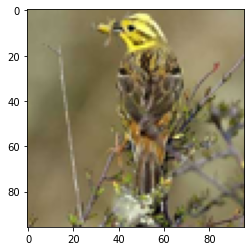

(5000, 96, 96, 3)
(5000,)
(2500, 96, 96, 3)
(2500,)


In [2]:
DATA_PATH = './data/stl10_binary/train_X.bin'
LABEL_PATH = './data/stl10_binary/train_y.bin'

if __name__ == "__main__":
    # download data if needed
    # download_and_extract()

    # test to check if the image is read correctly
    with open(DATA_PATH) as f:
        image = read_single_image(f)
        plot_image(image)

    # test to check if the whole dataset is read correctly
    images = read_all_images(DATA_PATH)
    print(images.shape)

    labels = read_labels(LABEL_PATH)
    print(labels.shape)
    relevant_classes = np.array([1, 2, 9, 7, 3])
    train_images, train_labels = keep_relevant_images(images, labels, relevant_classes)
    print(train_images.shape)
    print(train_labels.shape)

# **2. Bag-of-Words based Image Classification**

Bag-of-Words based Image Classification system contains the following steps: 
1. Feature extraction and description
2. Building a visual vocabulary
3. Quantify features using visual dictionary (encoding)
4. Representing images by frequencies of visual words
5. Train the classifier

We will consider each step in detail.


## **2.1 Feature Extraction and Description**

SIFT descriptors can be extracted from either (1) densely sampled regions or (2) key points. You can use SIFT related functions in *OpenCV* for feature extraction.

####  **` Q2.1: Extract SIFT descriptor from training datasets based on both densely sampled regions and key points. For both extraction approaches, show two image from each of the five class (draw the circles with size of keypoint). (10-pts).`**  

**Hint:**
Check out the Docs of SIFT and related functions for further information in the following [link1](https://docs.opencv.org/master/da/df5/tutorial_py_sift_intro.html) and [link2](https://docs.opencv.org/3.4.9/d5/d3c/classcv_1_1xfeatures2d_1_1SIFT.html).

**Note:**
For copyright reason, the newest version of OpenCV does not contain SIFT related function. However you can install an old version (for example: opencv-python==3.4.2.17 and opencv-contrib-python==3.4.2.17). 

In [3]:
#####################################################
# referenced codes: 
######################################################


# Get keypoints for all images
def feature_extraction(train_images):

    # Initialize list containing descriptors for all images
    des_feature_list = []

    # For loop performing SIFT feature extraction on all images
    for image in train_images:
        sift = cv2.xfeatures2d.SIFT_create()
        kp, des = sift.detectAndCompute(image, None)
        
        if des is not None:
            for feature in des:
                des_feature_list += [feature]

    # Get densely sampled regions for all images
    dense_sample_list = []

    for image in train_images:
        dense_sample_list += ['hello']
        
    return des_feature_list, dense_sample_list

In [4]:
# Visualizing

## **2.2 Building Visual Vocabulary**

Here, we will obtain visual words by clustering feature descriptors, so each cluster center is a visual word. Take a subset (maximum half) of all training images (this subset should contain images from ALL categories), extract SIFT descriptors from all of these images, and run k-means clustering (you can use your favourite k-means implementation) on these SIFT descriptors to build visual vocabulary. Then, take the rest of the training images to calculate visual dictionary. Nonetheless, you can also use less images, say 100 from each class (exclusive from the previous subset) if your computational resources are limited. Pre-defined cluster numbers will be the size of your vocabulary. In this question, set its size to 1000. 

####  **` Q2.2: Building Visual Vocabulary. (10-pts)`**
Create visual vocabulary by using K-means clustering. Remember to display the results when the vocabulary subset is 30\%, 40\%, 50\% and 60\% amount of the training images. The vocabulary size is fixed 1000 in this question.

**Hint:** Remember first to debug all the code with a small amount of input images and only when you are sure that code functions correctly run it for training over the larger data. You can achieve K-means clustering using either \textit{sklearn} package or \textit{scipy} package.

In [6]:
images_subset = images[:len(images)//2]

In [7]:
descriptors = feature_extraction(images_subset)[0]

In [8]:
from sklearn.cluster import KMeans

def kmeans(descriptors, k = 1000):
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(descriptors)
    vocabulary = kmeans.cluster_centers_
    
    return vocabulary

In [11]:
centers = kmeans(descriptors[:10000])

In [12]:
centers.shape

(1000, 128)

## **2.3 Encoding Features Using Visual Vocabulary**

Once we have a visual vocabulary, we can represent each image as a collection of visual words. For this purpose, we need to extract feature descriptors (SIFT) and then assign each descriptor to the closest visual word from the vocabulary.

## **2.4 Representing images by frequencies of visual words**

The next step is the quantization. The idea is to represent each image by a histogram of its visual words. Check out ***matplotlib***'s *hist* function. Since different images can have different numbers of features, histograms should be normalized.

####  **` Q2.4: Representing images by frequencies of visual words. (5-pts)`**

Pick one of the subset ratios from the above four settings (30%, 40%, 50% and 60%). Show the histogram of each class
under this setting. Describe the similarities and differences

In [ ]:
################################
# Todo: finish the code
################################

## **2.5 Classification**

We will train a classifier per each object class. Now, we take the Support Vector Machine (SVM) as an example. As a result, we will have 5 binary classifiers. Take images from the training set of the related class (should be the ones which you did not use for dictionary calculation). Represent them with histograms of visual words as discussed in the previous section. Use at least 50 training images per class or more, but remember to debug your code first! If you use the default setting, you should have 50 histograms of size 500. These will be your positive examples. Then, you will obtain histograms of visual words for images from other classes, again about 50 images per class, as negative examples. Therefore, you will have 200 negative examples. Now, you are ready to train a classifier. You should repeat it for each class. To classify a new image, you should calculate its visual words histogram as described in Section 2.4 and use the trained SVM classifier to assign it to the most probable object class. (Note that for proper SVM scores you need to use cross-validation to get a proper estimate of the SVM parameters. In this assignment, you do not have to experiment with this cross-validation step).

####  **` Q2.5: Classification (5-pts)`**

Utilize SVM and finish classification training.

**Hint:**
You can use *scikit-learn* software to conduct SVM classification. The relevant documents can be found at [link](https://scikit-learn.org/stable/modules/svm.html).

In [ ]:
################################
# Todo: finish the code
################################

## **2.6 Evaluation**

To evaluate your system, you should take all the test images from all classes and rank them based on each binary classifier. In other words, you should classify each test image with each classifier and then sort them based on the classification score. As a result, you will have five lists of test images. Ideally, you would have images with airplanes on the top of your list which is created based on your airplane classifier, and images with cars on the top of your list which is created based on your car classifier, and so on.

In addition to the qualitative analysis, you should measure the performance of the system quantitatively with the Mean Average Precision over all classes. The Average Precision for a single class c is defines as
\begin{equation}
\frac{1}{m_c} \sum_{i=1}^{n} \frac{f_c(x_i)}{i}\mbox{ ,}
\end{equation}
where $n$ is the number of images ($n=50\times 5=250$), $m$ is the number of images of class $c$ ($m_c=50$), $x_i$ is the $i^{th}$ image in the ranked list $X = \left \{ x_1, x_2, \dots, x_n  \right \}$, and finally, $f_c$ is a function which returns the number of images of class $c$ in the first $i$ images if $x_i$ is of class $c$, and 0 otherwise. To illustrate, if we want to retrieve $R$ and we get the following sequence: $[R, R, T, R, T, T, R, T]$, then $n = 8$, $m = 4$, and $AP(R, R, T, R, T, T, R) = \frac{1}{4} \left (  \frac{1}{1} + \frac{2}{2} + \frac{0}{3} + \frac{3}{4} + \frac{0}{5} + \frac{0}{6} + \frac{4}{7} + \frac{0}{8} \right )$.

####  **` Q2.6: Evaluation and Discussion (30-pts)`**

Show the evaluation results and describe. For the qualitative evaluation, you are expected to visualize the top-5 and the bottom-5 ranked test images (based on the classifier confidence for the target class) per setup. The report should include the analysis of the results for different settings such as:
- mAP based on different subset ratios to create the vocabulary list (30%, 40%, 50% and 60%) under the fixed vocabulary size 1000.
- Based on the ratio among the above four settings that lead to the best performance, change the vocabulary sizes to different sizes (500, 1000, 1500, 2000). Report and discuss the mAP.
- Based on the above experiments, find the best setting. Report the mAP based on SIFT descriptor and HoG descriptor. 
- The impact of the hyper-parameters of SVM.  

**Hint 1:**
To alleviate the working load, the discussion on the impact of SVM’s hyper-parameter settings only need to based on the optimal settings from the first three questions.

**Hint 2:**
Be sure to discuss the differences between different settings such as vocabulary sizes in your report.

**Hint 3:**
You can use *skimage.feature.hog* to extract HoG descriptor. The relevant documents can be found at [link](https://scikit-image.org/docs/dev/api/skimage.feature.html?highlight=hog#skimage.feature.hog).

In [ ]:
################################
# Todo: finish the code
################################